In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

df = pd.read_csv("netflix_titles.csv")

# Clean dataset
df = df.drop_duplicates()
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Prepare ML data
df_ml = df.copy()
features = ['release_year', 'rating', 'duration', 'country', 'listed_in']

# Convert duration to numeric
df_ml['duration'] = df_ml['duration'].str.replace(' min', '', regex=True).str.replace(' Seasons', '', regex=True)
df_ml['duration'] = pd.to_numeric(df_ml['duration'], errors='coerce').fillna(0)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_ml['rating'] = encoder.fit_transform(df_ml['rating'])
df_ml['country'] = encoder.fit_transform(df_ml['country'])
df_ml['listed_in'] = encoder.fit_transform(df_ml['listed_in'])

# Encode target: Movie=1, TV Show=0
df_ml['type'] = encoder.fit_transform(df_ml['type'])

X = df_ml[features]
y = df_ml['type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()


(      release_year  rating  duration  country  listed_in
 5471          2017       9      79.0      603        274
 530           2015      10       2.0      603        433
 5594          2017       9      67.0      603        470
 996           2021      11     116.0      319        353
 6951          2018      11       2.0       58        385,
 5471    0
 530     1
 5594    0
 996     0
 6951    1
 Name: type, dtype: int64)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=200)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
logreg_pred = log_reg.predict(X_test)
rf_pred = rf_model.predict(X_test)

logreg_pred[:10], rf_pred[:10]


(array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0]), array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression Metrics
log_acc = accuracy_score(y_test, logreg_pred)
log_prec = precision_score(y_test, logreg_pred)
log_rec = recall_score(y_test, logreg_pred)
log_f1 = f1_score(y_test, logreg_pred)

# Random Forest Metrics
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Display Comparison Table
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc],
    "Precision": [log_prec, rf_prec],
    "Recall": [log_rec, rf_rec],
    "F1 Score": [log_f1, rf_f1]
})

print("📌 Model Comparison\n")
print(results)

# Optional: Detailed Report for Random Forest
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred))


📌 Model Comparison

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.998865   0.998175  0.998175  0.998175
1        Random Forest  1.000000   1.000000  1.000000  1.000000

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



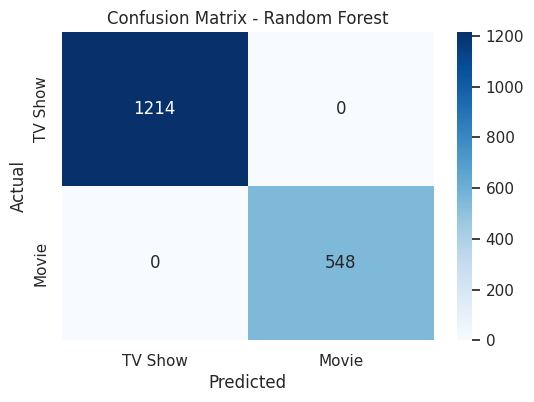

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest (Best Model)
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["TV Show","Movie"],
            yticklabels=["TV Show","Movie"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
